In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.datasets import load_digits # 导入手写数字集
from sklearn.model_selection import learning_curve # 导入学习曲线类
sns.set()

In [20]:
data = load_digits()
x, y = data.data,data.target # 加载特征矩阵和标签

In [21]:
def plot_learning_curve(estimator, title, X, y, 
                        ax=None,        #选择子图
                        ylim=None,      #设置纵坐标的取值范围
                        cv=None,        #交叉验证
                        n_jobs=None     #设定索要使用的线程
                       ):
    
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
                                                            ,shuffle=True
                                                            ,cv=cv
                                                            ,random_state=420
                                                            ,n_jobs=n_jobs)      
    if ax == None:
        ax = plt.gca()
    else:
        ax = plt.figure()
        
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")

    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
            , color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
            , color="g",label="Test score")
            
    ax.legend(loc="best")
    return ax

In [22]:
cv = KFold(n_splits=5, shuffle = True, random_state=42) #交叉验证模式

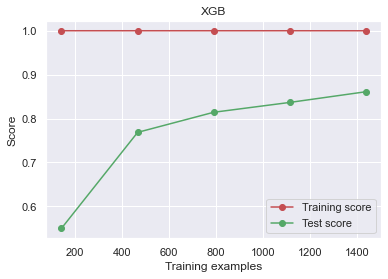

In [23]:
from xgboost import XGBRegressor as XGBR
plot_learning_curve(XGBR(n_estimators=100, random_state=420)
                    ,"XGB", x, y, ax=None, cv=cv)
plt.show()